In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_csv("batters.csv")

In [155]:
df = df.replace(False, 0)
df = df.replace(True, 1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [156]:
batters_data = df[df.active_player ==0]
batters_data = batters_data[batters_data.name != 'Walter Alston'] # Take out manager - doesn't belong in player data
batters_data = batters_data.dropna() # Drops all null values

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='years_played', ylabel='hall_of_fame'>

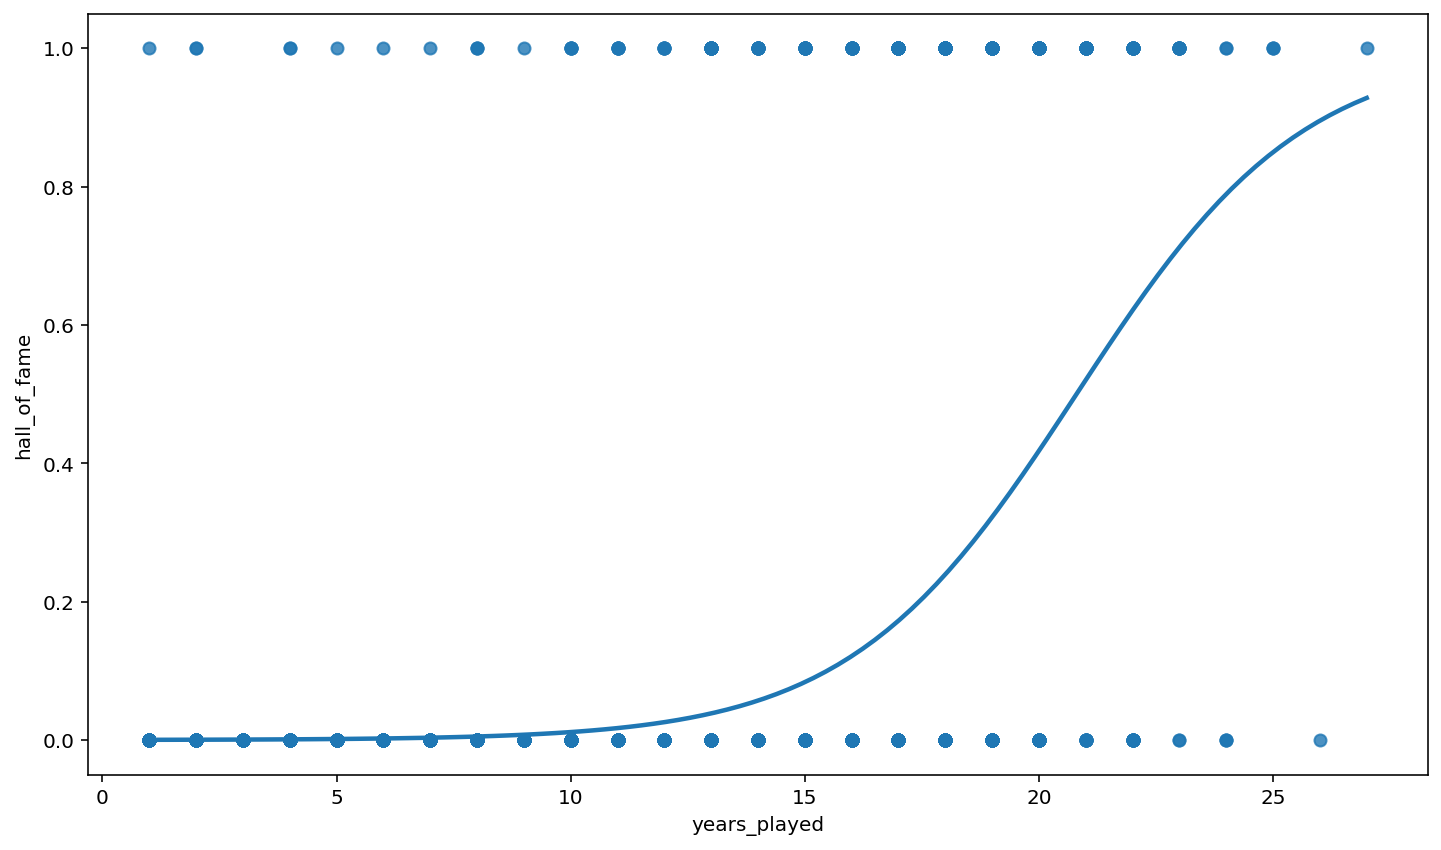

In [157]:
#sns.regplot(x=batters_data['years_played'], y=batters_data['hall_of_fame'], data=df, logistic=True, ci=None)

<class 'pandas.core.frame.DataFrame'>


In [159]:
batters_data = batters_data[~batters_data.isin([np.nan, np.inf, -np.inf]).any(1)]

,link,name,hall_of_fame,active_player,years_played,career_batting_average,career_hits,career_HRs,career_WAR,career_RBIs,career_runs,career_OBP,career_SLG,career_OPS,world_series_wins,golden_glove_awards,mvps,career_hitting_titles,silver_slugger_awards,all_star_apps
0,http://www.baseball-reference.com/players/a/aa...,Henry Aaron,1,0,23,0.305,3771,755,143.1,2297.0,2174,0.374,0.555,0.928,1,3,1,2,0,25
1,http://www.baseball-reference.com/players/a/aa...,Tommie Aaron,0,0,7,0.229,216,13,-2.8,94.0,102,0.292,0.327,0.619,0,0,0,0,0,0
2,http://www.baseball-reference.com/players/a/ab...,Andy Abad,0,0,3,0.095,2,0,-0.4,0.0,1,0.240,0.095,0.335,0,0,0,0,0,0
3,http://www.baseball-reference.com/players/a/ab...,John Abadie,0,0,1,0.224,11,0,-0.1,5.0,4,0.224,0.224,0.449,0,0,0,0,0,0
4,http://www.baseball-reference.com/players/a/ab...,Ed Abbaticchio,0,0,9,0.254,772,11,8.7,324.0,355,0.325,0.325,0.650,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12267,http://www.baseball-reference.com/players/z/zu...,Julio Zuleta,0,0,2,0.247,43,9,-0.2,36.0,24,0.309,0.466,0.774,0,0,0,0,0,0
12269,http://www.baseball-reference.com/players/z/zu...,Bob Zupcic,0,0,4,0.250,199,7,-0.7,80.0,99,0.303,0.346,0.648,0,0,0,0,0,0
12270,http://www.baseball-reference.com/players/z/zu...,Frank Zupo,0,0,3,0.167,3,0,-0.1,0.0,3,0.250,0.222,0.472,0,0,0,0,0,0
12271,http://www.baseball-reference.com/players/z/zu...,Paul Zuvella,0,0,9,0.222,109,2,-2.3,20.0,41,0.275,0.277,0.552,0,0,0,0,0,0


In [229]:
X = batters_data.drop(['hall_of_fame','link','name','career_OPS','active_player'],axis=1)
                      #'career_batting_average','career_OBP','career_SLG','world_series_wins','golden_glove_awards','silver_slugger_awards','mvps'], axis=1)
Y = batters_data.hall_of_fame

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, Y_train)
#Y_pred_train = model.predict(X_train)
#from sklearn.metrics import classification_report
#classification_report(y_true, y_pred_train, target_names=target_names
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



#est = sm.OLS(Y_pred, X_tr)
#est2 = est.fit()
#print(est2.summary())
p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
score_ = model.score(X_test, Y_test)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
weight = model.coef_ 

print(model.intercept_)

print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')
print('weight', weight, sep = '\n')
print('intercept', model.intercept_, sep = '\n')
#print('Coefficient of determination (R^2): %.2f'
     # % r2_score(Y_train, Y_pred_train))
#Y_pred_test = model.predict(X_test)
#print('Coefficient of determination (R^2): %.2f'
#      % r2_score(Y_test, Y_pred_test))
#model.summary()


[-8.17665411]
y_pred: [0 0 0 ... 0 0 0]

score_: 0.9902697921273773

conf_m:
[[2219    1]
 [  21   20]]

report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2220
           1       0.95      0.49      0.65        41

    accuracy                           0.99      2261
   macro avg       0.97      0.74      0.82      2261
weighted avg       0.99      0.99      0.99      2261

weight
[[ 0.0693227   1.19976254 -0.00186209 -0.01422069  0.06977224  0.00532942
   0.00148017  0.20871602  1.35770357  0.15423319 -0.1331342  -0.15941322
   0.42319751 -0.1432964   0.26914146]]
intercept
[-8.17665411]


In [230]:
coeffs = {}
cols = (list(X.columns))
for i in range(len(cols)):
    coeffs[cols[i]] = weight[0][i]
coeffs

{'years_played': 0.06932269875160918,
 'career_batting_average': 1.1997625374966967,
 'career_hits': -0.001862090697692,
 'career_HRs': -0.014220694349811875,
 'career_WAR': 0.0697722385759964,
 'career_RBIs': 0.005329421371545152,
 'career_runs': 0.0014801696280841437,
 'career_OBP': 0.20871601533848172,
 'career_SLG': 1.3577035659114352,
 'world_series_wins': 0.15423318878441855,
 'golden_glove_awards': -0.13313419587778969,
 'mvps': -0.15941321994912458,
 'career_hitting_titles': 0.42319751247365056,
 'silver_slugger_awards': -0.14329640307913047,
 'all_star_apps': 0.2691414574405233}